In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn


In [2]:
df = pd.read_csv("firewall_reduced.csv")

In [15]:
import csv

with open('firewall_reduced_ascii.csv', 'w') as outfile:
     c = csv.writer(outfile)
     counter = 0
     with open('firewall_reduced.csv','rb') as f:
         for row in csv.reader(f, delimiter=','):
            counter = counter + 1
            mod_row = []
            if counter != 1:
                for cell in row:
                    mod_row.append(sum(bytearray(cell)))
            else:
                for cell in row:
                    mod_row.append(cell)
            c.writerow(mod_row)

print "processed {} rows".format(counter)

processed 348818 rows


In [3]:
df=pd.read_csv('firewall_reduced_ascii.csv')

In [4]:
df

,action,protocol,src-ip,dst-ip,src-port,dst-port,size,path
0,383,233,685,558,259,257,48,515
1,383,233,704,558,255,257,48,515
2,383,233,703,558,205,257,48,515
3,383,233,745,558,262,257,48,515
4,383,231,704,558,271,257,48,515
5,383,233,563,558,265,257,48,515
6,383,233,691,558,248,257,48,515
7,383,233,610,558,263,257,48,515
8,383,231,558,606,260,104,48,298
9,383,233,659,558,262,257,48,515


In [4]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
%matplotlib inline

In [5]:
#Load data set
data = pd.read_csv('firewall_reduced_ascii.csv')


In [6]:
X=data.values

In [7]:
print(X)

[[383 233 685 ..., 257  48 515]
 [383 233 704 ..., 257  48 515]
 [383 233 703 ..., 257  48 515]
 ..., 
 [383 231 558 ..., 155  48 298]
 [383 231 558 ..., 155  48 298]
 [383 231 558 ..., 155  48 298]]


In [8]:
X.dtype

dtype('int64')

In [35]:
pd.to_numeric(X[])

SyntaxError: invalid syntax (<ipython-input-35-85431d43a0b1>, line 1)

In [9]:
#Scaling the values
X = scale(X)

/home/shradha/virtualenvironment/ML/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X.dtype

dtype('float64')

In [11]:
pca = PCA()

In [43]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [12]:
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca.components_)

[[ 0.4101612  -0.01454599 -0.46287779 -0.38946976  0.42031167  0.31994109
  -0.42905666  0.04999843]
 [ 0.49933789 -0.09120186  0.14836621  0.38274237 -0.13982368 -0.36632134
  -0.4870225  -0.42767597]
 [-0.16668489 -0.49442932 -0.4719351  -0.36847619 -0.18049801 -0.41083944
   0.17466481 -0.37065075]
 [ 0.20850772 -0.55993757  0.14794067 -0.09487307 -0.50919926  0.16470683
  -0.1676046   0.54553055]
 [ 0.11828643  0.63884906 -0.10921751 -0.40535186 -0.47013934 -0.35407996
  -0.12413535  0.19957054]
 [-0.04855022  0.14681052 -0.24870432  0.12921039 -0.53848377  0.64506767
   0.00215025 -0.43755993]
 [ 0.36671765 -0.03527299  0.57467763 -0.53672621  0.02795377  0.15144441
   0.31884194 -0.34722842]
 [ 0.60028284  0.05054266 -0.33924293  0.29658979 -0.01211784 -0.05575535
   0.63485902  0.16659291]]


In [14]:
print(pca.explained_variance_)

[ 2.2331092   1.82972612  1.59489055  1.08839019  0.6003435   0.35421454
  0.17989795  0.11945089]


In [15]:
B = pca.transform(A)

NameError: name 'A' is not defined

In [55]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [56]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [57]:
print var1

[ 27.91  50.78  70.72  84.32  91.82  96.25  98.5   99.99]


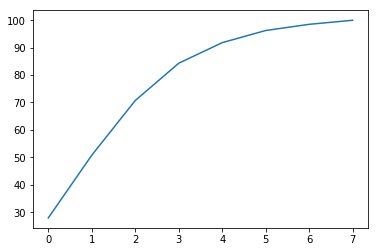

In [58]:
plt.plot(var1)

In [60]:
#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)


In [61]:

print X1

[[ 0.47027215 -0.45459643 -0.53757525  0.36593172  0.04179813]
 [ 0.38120099 -0.42541285 -0.55274327  0.44096027  0.09149393]
 [-0.26942695 -0.20894707 -0.27052709  1.23091362  0.82188152]
 ..., 
 [-0.1813787   1.34504291  1.23476376 -1.33467337  0.05993642]
 [-0.15527597  1.3363594   1.22355424 -1.36629631  0.03073923]
 [-0.14222461  1.33201765  1.21794948 -1.38210778  0.01614064]]


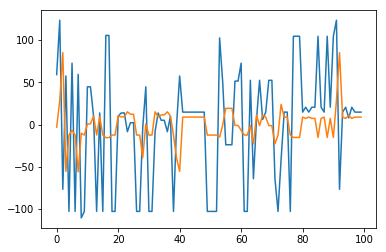

In [80]:
plt.plot(X1)

In [63]:
data

,action,protocol,src-ip,dst-ip,src-port,dst-port,size,path
0,383,233,685,558,259,257,48,515
1,383,233,704,558,255,257,48,515
2,383,233,703,558,205,257,48,515
3,383,233,745,558,262,257,48,515
4,383,231,704,558,271,257,48,515
5,383,233,563,558,265,257,48,515
6,383,233,691,558,248,257,48,515
7,383,233,610,558,263,257,48,515
8,383,231,558,606,260,104,48,298
9,383,233,659,558,262,257,48,515


In [73]:
d1 = data.tail(100)

[ 91.04  99.58  99.98  99.99  99.99  99.99  99.99  99.99]


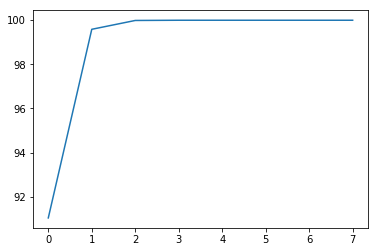

In [74]:
X2=d1.values
pca = PCA()
pca.fit(X2)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1
plt.plot(var1)

In [86]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.tools as tls

[[  5.91375854e+01  -3.10634107e+00  -2.27797244e+00]
 [  1.23464545e+02   2.82759642e+01   4.01220141e-01]
 [ -7.66340575e+01   8.51071295e+01  -3.47300345e+00]
 [  5.75014931e+01  -5.54847236e+01  -5.01268401e+00]
 [ -1.02817255e+02  -1.24138116e+01   5.01197455e+00]
 [  7.26541975e+01  -6.72756161e+00   3.66696894e+00]
 [ -1.02833638e+02  -1.24614391e+01  -4.98511993e+00]
 [  5.94314317e+01  -5.60080761e+01  -6.01329212e+00]
 [ -1.10522754e+02  -1.03007329e+01   9.06143166e+00]
 [ -1.02823808e+02  -1.24328626e+01   1.01313676e+00]
 [  4.46425680e+01   7.59268647e-01  -7.26977973e+00]
 [  4.46409298e+01   7.54505898e-01  -8.26948918e+00]
 [  9.89875918e+00   1.01653262e+01   7.74203786e+00]
 [ -1.02817255e+02  -1.24138116e+01   5.01197455e+00]
 [  1.37586363e+01   9.11862111e+00   5.74082165e+00]
 [ -1.02813979e+02  -1.24042861e+01   7.01139344e+00]
 [  1.05505259e+02  -1.55239197e+01   3.69871641e+00]
 [  1.05503620e+02  -1.55286824e+01   2.69900696e+00]
 [ -1.02828723e+02  -1.24471

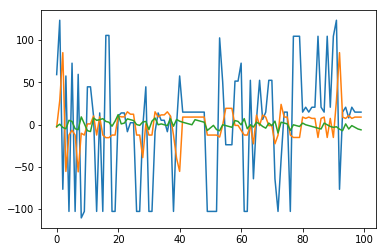

In [94]:
#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=3)
pca.fit(X)
X1=pca.fit_transform(X2)
print X1
plt.plot(X1)

